### Task 1: EM Algorithm via kmeans
We aim to mininize:
$$J(\mathbf{M},\mathbf{R}) = \sum_{n=1}^N\sum_{k=1}^K r_{nk} ||\mathbf{x}\_n-\mathbf{m}_k||_2^2. $$
Where M is the matrix of all K cluster centers $\in \mathbb{R}^{DxK}$ and R is all points onehot assigned to one cluster $\in \mathbb{R}^{NxK}$ meaning for each point it's 1 for the cluster it's assigned to and 0 everywhere else

We need to compute the derivative

##### a. Assume $\mathbf{m}_k$ are known, estimate the binary values $r_{nk}$. Keep in mind that for each $n$ one $k$ must be assigned.
$$
J(\mathbf{R}|\mathbf{M})=\sum\limits_{n=1}^N g(r_{nk}) 
$$ 
$$ 
g( r_{ nk } ) = \sum\limits_{k=1}^K r_{nk} ||\mathbf{x}_n-\mathbf{m}_k||_2^2 
$$

Hints:
- Consider that this can be done independently for each single data point $\mathbf{x}_n$
- When you compute the derivative and set it to zero, you might end up confused. Consider this: At some point, do not calculate but give a reason for a good choice of the binary values $r_{kn}$ in written form instead

The first equation says we get J(R) given M by the sum of each point given to the function g, for all points. g finds the sum of that that entry in r multiplied with the squared distance (the derivative of the square distance?) between the corresponding point and the cluster for each cluster. 

As only one of the $r_{nk}$ is 1, we simply need to find the minimum distance - that is the closest cluster center to the point.

We thus need to set it equals zero to find where it's minimized

$g(r_{nk}) = \sum_{k=1}^K r_{nk} ||x_n - m_k||_2^2$

Limit to k = 3

Then generalize later for all k

$$g(r_{nk}) = r_{n1} || x_1 - m_1||_2^2 + r_{n2} || x_n - m_2||_2^2 + r_{n3} || _n - m_3 ||_2^2$$

$$
\frac{∂g}{∂r_{nk}} = \begin{pmatrix} \frac{∂g}{∂r_{n1}} \\ \frac{∂g}{∂r_{n2}} \\ \frac{∂g}{∂r_{n3}} \end{pmatrix} = \begin{pmatrix} ||x_1-m_1||_2^2 \\ || x_2-m_2||_2^2 \\ ||x_3-m_3||_2^2 \end{pmatrix}
$$

$$
r_{nk} = if y k = argmin |x_n-m_k||_2^2 else 0
$$

##### b. Assume $r_{nk}$ are known, estimate $\mathbf{m}_k$. Compute the derivative of $J$ with respect to $\mathbf{m}_k$, set it to zero and then deduce the estimates for $\mathbf{m}_k$. By rewriting
$$
J(\mathbf{M}|\mathbf{R})= \sum_{k=1}^K h(\mathbf{m}_k),
$$
We can focus on one cluster center $k$ at a time by:
$$
h(\mathbf{m}_k) = \sum\limits_{n=1}^N r_{nk} ||\mathbf{x}_n-\mathbf{m}_k||_2^2
$$
Hint: $||\mathbf{x}_n-\mathbf{m}_k||_2^2 = (\mathbf{x}_n-\mathbf{m}_k)^T (\mathbf{x}_n-\mathbf{m}_k)$

J(M,R) = $\sum^M \sum^K r_{nk} || x_n - m_k||_2^2$

$h(m_k) = \sum^N r_{nk} || x_n - m_k ||_2^2 = \sum^N r_{nk} (x_n - m_k)^T (x_n-m_k)$

$\frac{dh}{dm_k} = \sum^N r_{nk}(-2)(x_n-m_k) = -2\sum^N (x_n-m_k)$

$0 = -2\sum^N r_{nk} (x_n-m_k) = \sum^N -2 r_{nk} (x_n) + \sum^N 2r_{nk} (m_k)$

= $\sum^N r_{nk}(x_n) = \sum^N r_{nk} m_k$

$m_k = \frac{\sum^N r_{nk}x_n} {\sum r_{nk}}$

### Task 2: EM and GMMs
##### a. Try if you can find a good clustering for three clusters with GMMs


In [155]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import sklearn

# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

In [156]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

3


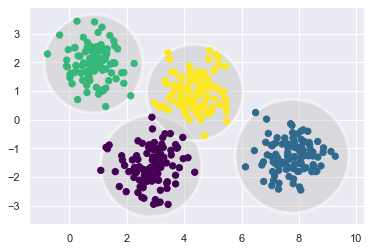

In [157]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)
print(kmeans.n_iter_)

14


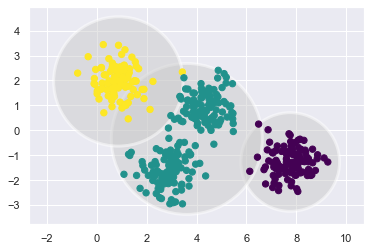

In [158]:
kmeans = KMeans(n_clusters=3, random_state=0)
plot_kmeans(kmeans, X)
print(kmeans.n_iter_)

In [159]:
# Generate some data
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=3,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

6


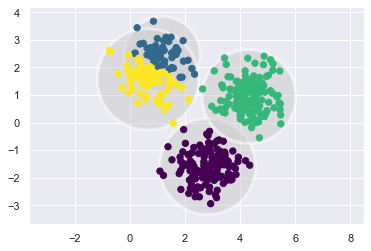

In [160]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)
print(kmeans.n_iter_)

3


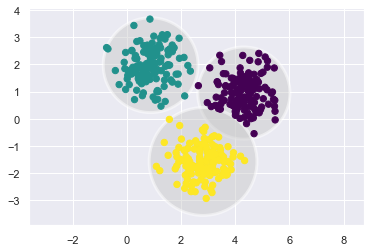

In [161]:
kmeans = KMeans(n_clusters=3, random_state=0)
plot_kmeans(kmeans, X)
print(kmeans.n_iter_)

##### b. How many iterations are needed? What is your best guess for the minimum number of iterations needed for a good result?

2-3 when the clusters matches real clusters

A few more when they don't - 6-14

##### c. Use different covariance types. How do the results differ?
Full seems the most expressive, being able in representing the data most closely

diag not so much but a bit more than spherical as expected

definition:
- Full: each component/cluster may choose any shape and position
- Diagonal: contour axes are oriented along coordinate axes. Shape may vary between components/clusters
- Spherical: Circular contours

##### d. For data generation: Look into the section "GMM for Generating New Data". Describe how the generated digits look to you.

Quite good - Some of them even quite better / closer to average than the inputs - however some also quite bad

##### e. From previous task: Change the amount of training data and other parameters. How do your observations from d change?

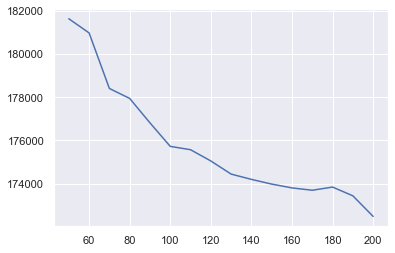

In [162]:
from sklearn.datasets import load_digits
from sklearn.mixture import GaussianMixture
digits = load_digits()
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
n_components = np.arange(50, 210, 10)
models = [GaussianMixture(n, covariance_type='diag', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

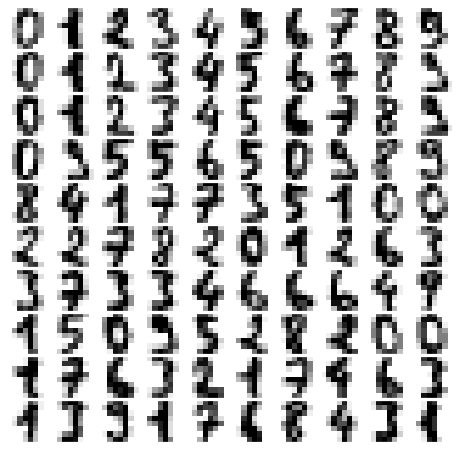

In [163]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

In [164]:
gmm = GaussianMixture(200, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


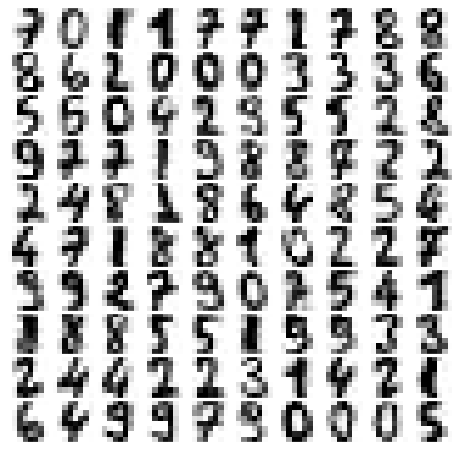

In [165]:
data_new = gmm.sample(100)
digits_new = pca.inverse_transform(data_new[0])
plot_digits(digits_new)

True


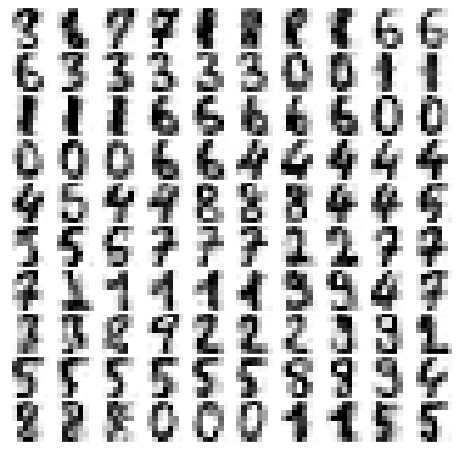

In [166]:
gmm = GaussianMixture(50, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)
data_new = gmm.sample(100)
digits_new = pca.inverse_transform(data_new[0])
plot_digits(digits_new)

Definitely seems to be better at more components

##### f. Extra non-mandatory: Change the data generation or use your own data and see how your findings change

### Task 3: Principal Component Analysis (PCA)


In [167]:
import numpy as np
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

##### a. The steps are described in detail in the following. To test your implementation of the steps (1)-(6) on the bodyfat data, which originally has $D=15$ dimensions. Use your PCA implementation to perform dimensionality reduction from $D=15$ to $M=2$. Plot the resulting 2D datapoints $\mathbf{Z}_n \in \mathbb{R}^2$

Given: data points $x_n \in \mathbb{R}^D, n = 1, \ldots, N$

In [168]:
#load data
import pandas as pd
file = '../../data/bodyfat.txt'
columns = ['Density', 'Fat', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdom', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'F-arm', 'Wrist']
from string import whitespace
data_pd = pd.read_csv(file, names=columns, skiprows=11, header=None, delim_whitespace=True)
data_np = data_pd.to_numpy()
points = data_np

1. Compute sample mean $\overline{\mathbf{x}}=\frac{1}{N}\sum\limits_{n=1}^N\mathbf{x}_n$

In [169]:
def sample_mean(points):
    s = sum(points) / len(points)
    return s

2. Compute sample covariance matrix $\mathbf{S}=\frac{1}{N-1}\sum\limits_{n=1}^N(\mathbf{x}_n-\overline{\mathbf{x}})(\mathbf{x}_n-\overline{\mathbf{x}})^T$.

Please note that you may find descriptions with a different factor $\frac{1}{N}$ vs. $\frac{1}{N-1}$, and other variants of PCA using the correlation matrix instead of covariance matrix

In [170]:
def sample_covariance(points, mean):
    print(mean.shape)
    mean = mean.reshape(1,15)
    return sum([np.dot((p-mean).T, (p-mean)) for p in points]) / (len(points)-1)

3. Compute eigenvalues and eigenvectors $\mathbf{S}\mathbf{u_i} = \lambda_i\mathbf{u_i}$, $i=1,\ldots,M$, $\mathbf{S}\in\mathbb{R}^{D\times D}$, $\mathbf{u}_i\in\mathbb{R}^D$

In [171]:
def compute_eigen(points, m):
    #mean = sample_mean(points)
    #S = sample_covariance(points, mean)
    #eigen_va = mean.T @ S @ mean 
    #print('eigen_va: ', eigen_va)
    #print('eig(S): ', eig(S))
    #for i in range(m): #do we need to compute all d or only up to m?
        #compute eigenvalue and eigenvector
    return eig(S)

4. Reorder eigenvalues in decreasing order, i.e. $\lambda_i\geq \lambda_j$, $i>j$, and their eigenvectors correspondingly.

In [172]:
def sort_eigen(eigenvalues, eigenvectors):
    arr1inds = eigenvalues.argsort()
    eigenvalues = eigenvalues[arr1inds[::-1]]
    eigenvectors = eigenvectors[arr1inds[::-1]]
    return (eigenvalues, eigenvectors)

5. Choose number of components $M < D$ as desired. Put the corresponding $M$ largest eigenvectors $\mathbf{u_i}$ in decreasing order (by eigenvalue) into the matrix $\mathbf{U}=[\mathbf{u}_1, \ldots, \mathbf{u}_M]^T\in\mathbb{R}^{M \times D}$, i.e. such that $\mathbf{u}_1$ is the eigenvector corresponding to the largest eigenvalue

In [173]:
def choose_components(eigenvectors, m):
    return eigenvectors[:m]

6. How to feature extraction aka dimensionality reduction from $\mathbf{x}\in\mathbb{R}^D$ to $\mathbf{z}\in\mathbb{R}^M$, $M < D$
$$
\mathbb{R}^{M} \in \mathbf{z}_n = \mathbf{U}\left(\mathbf{x}_n-\overline{\mathbf{x}}\right)
$$

In [174]:
def feature_extract(points, eigenvectors, mean):
    U = eigenvectors #MxD
    points = points #NxD
    Z = np.dot(U, (points-mean).T).T 
    return Z #MxN

7. How to create a new data point $\mathbf{x}$. Choose (and vary) $\alpha_i$ between $-3\sqrt{\lambda_i} \leq \alpha_i \leq 3\sqrt{\lambda_i}$, to obtain
$$
\mathbf{x} = \overline{\mathbf{x}} + \sum_{i=1}^M \alpha_i \mathbf{u}_i
$$

In [204]:
#x = eigenvectors.dot(Z[0]) + mean
#print(x)
from numpy.random import default_rng
import math
rng = default_rng()

def generate(eigenvectors, eigenvalues):
    summed = np.zeros_like(eigenvectors[0])
    mean = sample_mean(points)
    for i in range(15):
        eig_sqrt = math.sqrt(eigenvalues[i])
        chosen_alpha = rng.uniform(-3*eig_sqrt, 3*eig_sqrt)
        #summed += chosen_alpha * eigenvectors[:, i]
        summed[i] += chosen_alpha * eigenvectors[0,i]
    new_datapoint = mean + summed
    return new_datapoint

new generated point:  [  1.037  24.178  44.933 173.75   70.323  37.98  101.891  93.095  99.656
  59.479  38.714  23.042  32.305  28.778  18.228]


##### Complete test

Dimensions

Points $\in \mathbb{R}^{NxD}$

mean (u) $\in \mathbb{R}^{D}$

S $\in \mathbb{R}^{DxD}$

$u_i$ $\in \mathbb{R}^{D}$

$U \in \mathbb{R}^{MxD}$

$Z \in \mathbb{R}^{MxN}$

In [ ]:
#points = np.array([[1,2], [3,4], [5,6]])
#print('points: ', points)

mean = (sample_mean(points))
#print('mean: ', mean)

S = sample_covariance(points, sample_mean(points))
#print('S: ', S)

eigenvalues, eigenvectors = compute_eigen(points, 15)

eigenvalues, eigenvectors = sort_eigen(eigenvalues, eigenvectors)
#print(eigenvalues, eigenvectors)

eigenvectors = choose_components(eigenvectors.T, 2)
#print('eigenvectors: ', eigenvectors)
Z = feature_extract(points, eigenvectors, mean)
#print('Z: ', Z)

x = generate(eigenvectors, eigenvalues)
print('new generated point: ', x)

Plot the resulting 2D datapoints $\mathbf{z}_n\in \mathbb{R}^2$:

In [ ]:
import matplotlib.pyplot as plt
print(Z.shape)
plt.scatter(Z[:, 0], Z[:, 1])
plt.show()

##### b. Perform dimensionality reduction via PCA using sklearn.decomposition.PCA. How do you have to set the input parameters?

In [ ]:
from sklearn.decomposition import PCA
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

pca = PCA(2) #dimensions of output
pca.fit(points) #fit data
#print('eigenvectors: ', pca.components_) #eigen vectors in sorted order
#print('eigenvalues:', pca.explained_variance_) #eigen values of the corresponding eigen vectors
B = pca.transform(points) #data expressed in the dimensions of the eigenvectors
#print('transformed: ', B) #we see we only need 1 of the 2 dimensions


In [ ]:
print(B.shape)
plt.scatter(B[:, 0], B[:, 1])

##### c. How can PCA be used to perform regression?

PCR - Pricinpal Component Regression - based on PCA

used to estimate the unknown regression coefficients in standard linear regression models.

By expressing as much information as possible in lower dimensionality, we can use linear regression no this to actually regress the more complex data

Have the bi-effects of working regularized and like shrinkage estimator as well.

### Task 4: PCA Face Model
The purpose of this task is to create a 3D face model from a set of 3D faces given as sets of 3D points. Use the provided data in faces.mat

Hint: To read mat-files in Python: import scipy.io mat = scipy.io.loadmat('file.mat')


##### a. Estimate a PCA for the data matrix $X$. Ideally you should use your own implementation from the previous task, but if you don't have one, use a buildin solution to proceed with the following tasks

##### b. Plot the mean feace $\overline{\mathbf{x}}$, and the variants of the first three principal components $\mathbf{u}_i$, $i=1,2,3$ as faces, i.e.: remember to add the mean face to each $\mathbf{u}_i$

##### c. Create 3 new faces, which are not part of the data by choosing a fixed number of components $M$, and vary the weights $\alpha_k$
$$
\mathbf{f} = \overline{\mathbf{x}}+\sum\limits_{k=1}^M \alpha_k \mathbf{u}_k
$$


##### d. Approximate a new shape. Choose one of your created shapes from task c, and pretend it is unkown, i.e. pretend that the weights $\alpha_k$ are unknown. (this would be the case for every new shape, which is not part of the training data or has not been generated by you.) The estimate the coefficients of the model with a lower dimension than before, i.e. choose $K < M$ and solve the following equation system for $\mathbf{\alpha}$:
$$\mathbf{f}_\text{new}-\overline{\mathbf{x}} = \mathbf{U} \mathbf{\alpha}, $$
where $\mathbf{\alpha} = (\alpha_1, \ldots, \alpha_K)$ and $\mathbf{U} = [\mathbf{0_1}, \ldots, \mathbf{u_K}]$.

Compute the approximated shape $\mathbf{f}_{\text{new}}\approx\widehat{\mathbf{f}}=\overline{\mathbf{x}} + \mathbf{U} \mathbf{\alpha}$

Visualize your result by plotting the true vs estimated shape. Compute the error as $||\widehat{\mathbf{f}}-\mathbf{f}||_2^2$?

##### e. How many components do you need to preserve at least 90% of the variance of the data?